In [1]:
# Team 6 MIS 548 
# Daniel Huber
# Joe Moon
# Niru Gaire
# Truman Kruse
# Varshith Thudum

In [7]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [9]:
%matplotlib inline

# Directory Path and Dataset Prefixes
data_dir = 'data'
prefix = ["107", "0"] 

print("Network 107 has 10 Communities")
print("Network 0 has 11 Communities \n")
# This is just for reference for our group
print("Degree Centrality: The number of edges it has")
print("Betweenness Centrality: A measure of how often a node lies on the shortest path between all pairs of nodes in a network.")
print("Clustering Coefficient: A metric of the degree to find the nodes in a network that cluster together. \n")
print("Network Diameter: The diameter is the maximum eccentricity. The eccentricity of a node v is the maximum distance from v to all other nodes in G.")
print("Triadic Closure: A measure of the tendency of edges in a graph to form triangles. It's a measure of the degree to which nodes in a graph tend to cluster together")

Network 107 has 10 Communities
Network 0 has 11 Communities 

Degree Centrality: The number of edges it has
Betweenness Centrality: A measure of how often a node lies on the shortest path between all pairs of nodes in a network.
Clustering Coefficient: A metric of the degree to find the nodes in a network that cluster together. 

Network Diameter: The diameter is the maximum eccentricity. The eccentricity of a node v is the maximum distance from v to all other nodes in G.
Triadic Closure: A measure of the tendency of edges in a graph to form triangles. It's a measure of the degree to which nodes in a graph tend to cluster together


Graph for network 107 loaded with 1034 nodes and 26749 edges.
Average Degree Centrality: 0.0500860388607294
Average Betweenness Centrality: 0.0018911588489826285
Average Clustering Coefficient: 0.5264047980773338
Network diameter of largest component: 9
Triadic closure: 0.5045088189930924


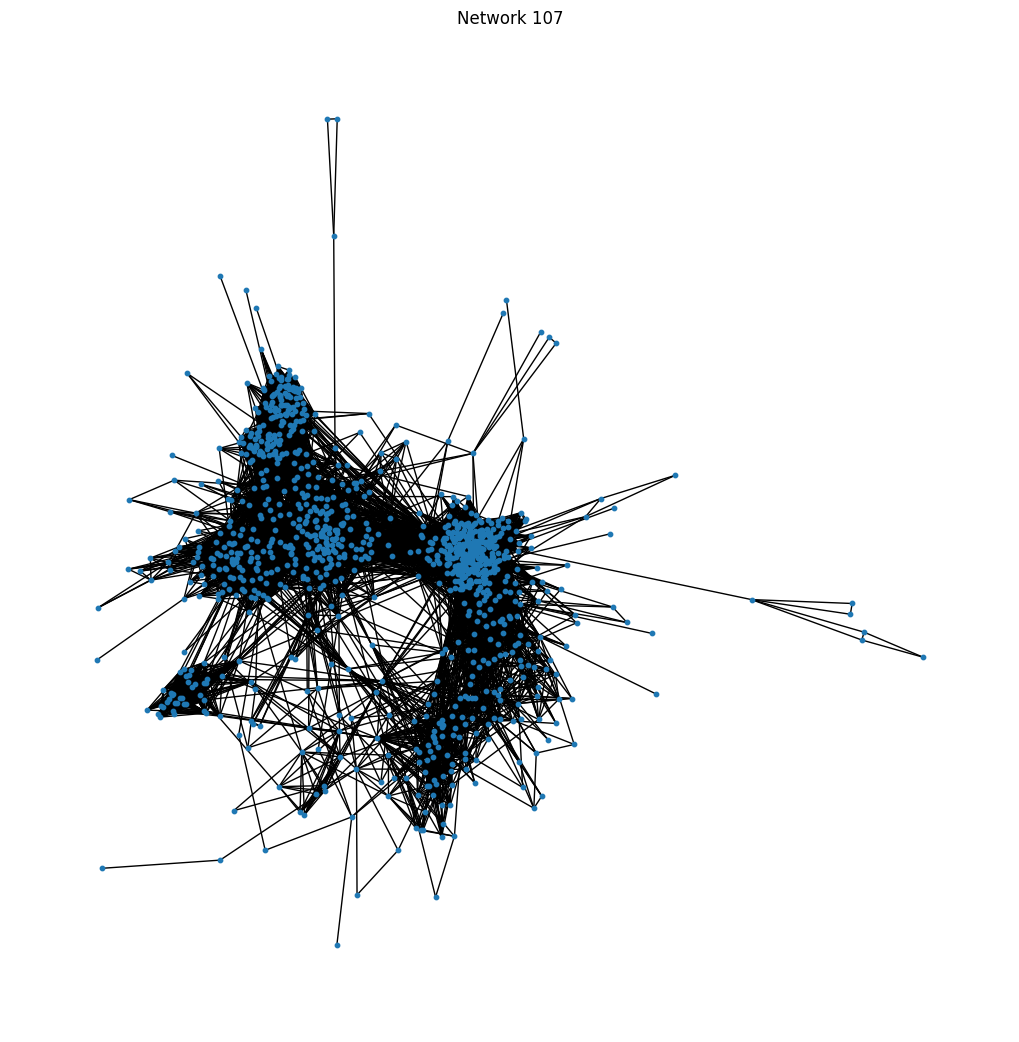

Most connected nodes in Network 107:
Node 1888 has 253 edges (degree)
Node 1800 has 244 edges (degree)
Node 1663 has 234 edges (degree)
Node 1352 has 233 edges (degree)
Node 1730 has 225 edges (degree)
Node 1431 has 219 edges (degree)
Node 1199 has 216 edges (degree)
Node 1584 has 210 edges (degree)
Node 1768 has 208 edges (degree)
Node 1086 has 204 edges (degree)


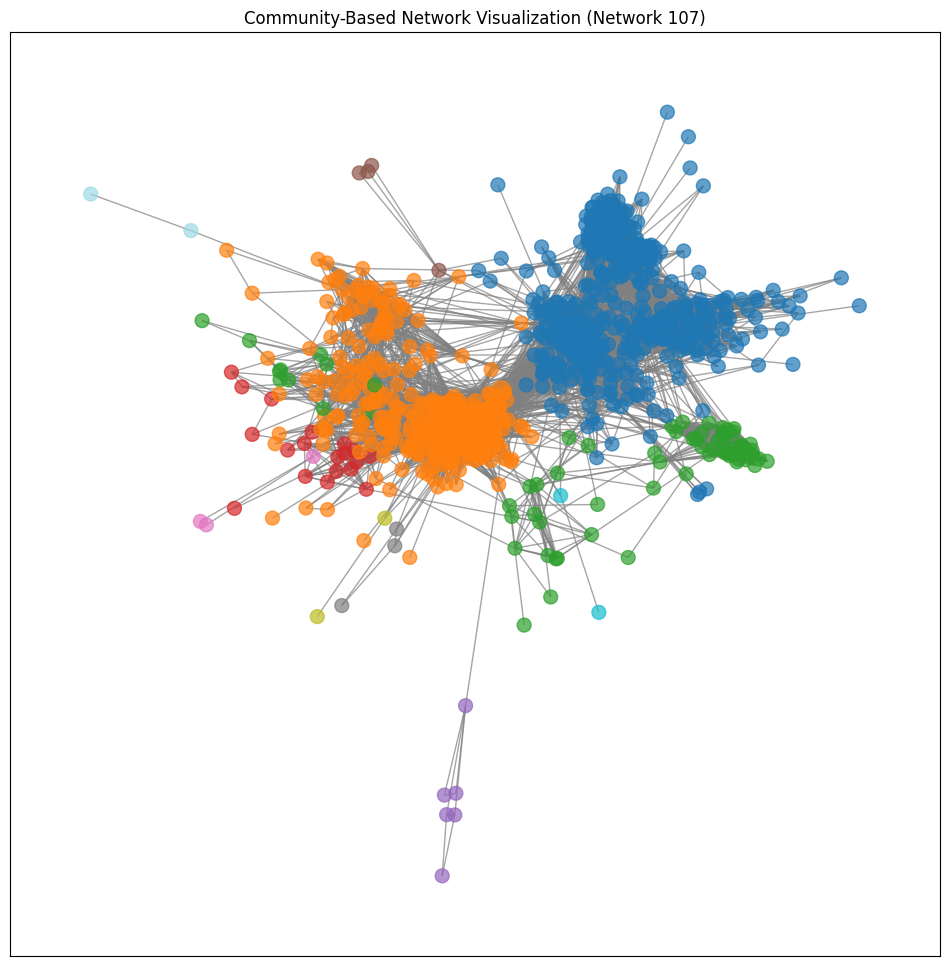



Graph for network 0 loaded with 333 nodes and 2519 edges.
Average Degree Centrality: 0.045569666051593766
Average Betweenness Centrality: 0.007872375706248963
Average Clustering Coefficient: 0.5082445417696636
Network diameter of largest component: 11
Triadic closure: 0.4258693841944566


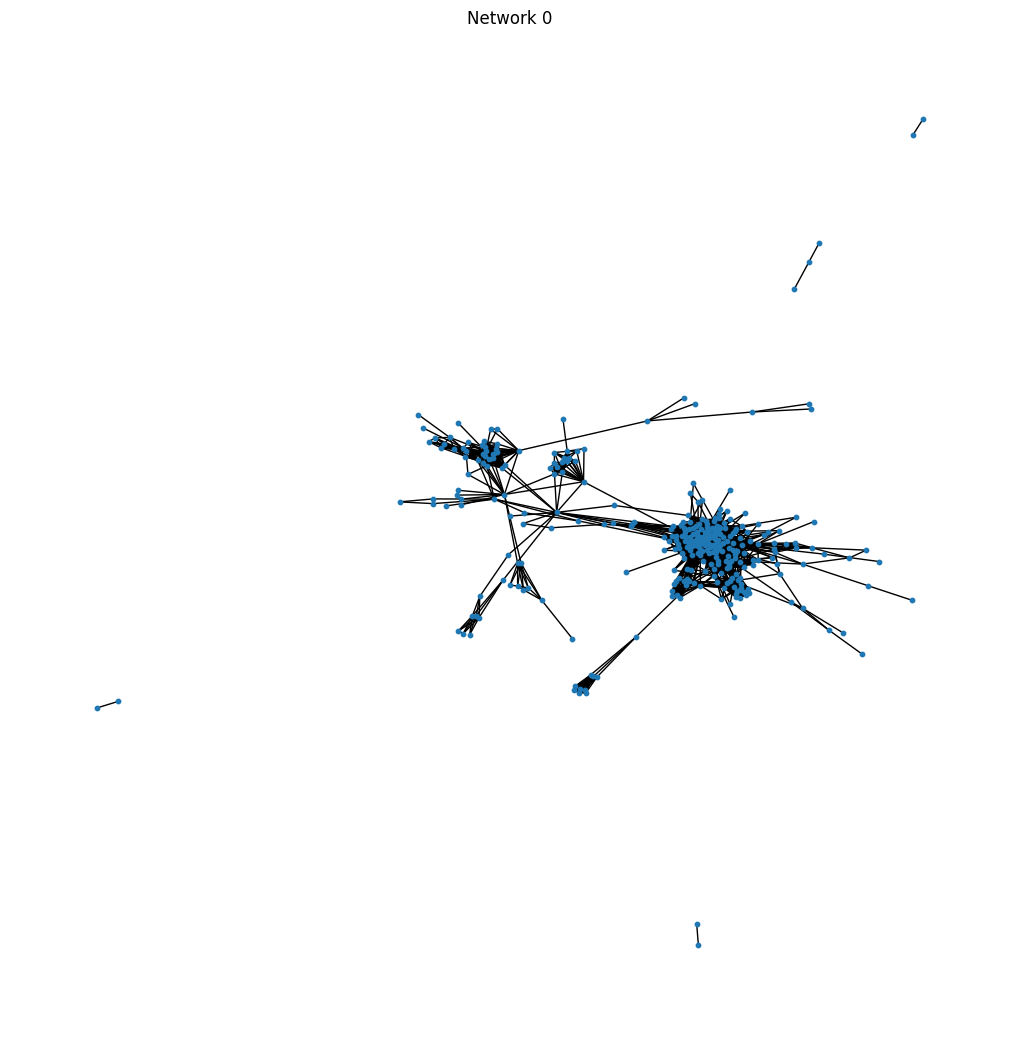

Most connected nodes in Network 0:
Node 56 has 77 edges (degree)
Node 67 has 75 edges (degree)
Node 271 has 72 edges (degree)
Node 322 has 71 edges (degree)
Node 25 has 68 edges (degree)
Node 26 has 67 edges (degree)
Node 252 has 64 edges (degree)
Node 277 has 64 edges (degree)
Node 21 has 64 edges (degree)
Node 122 has 62 edges (degree)


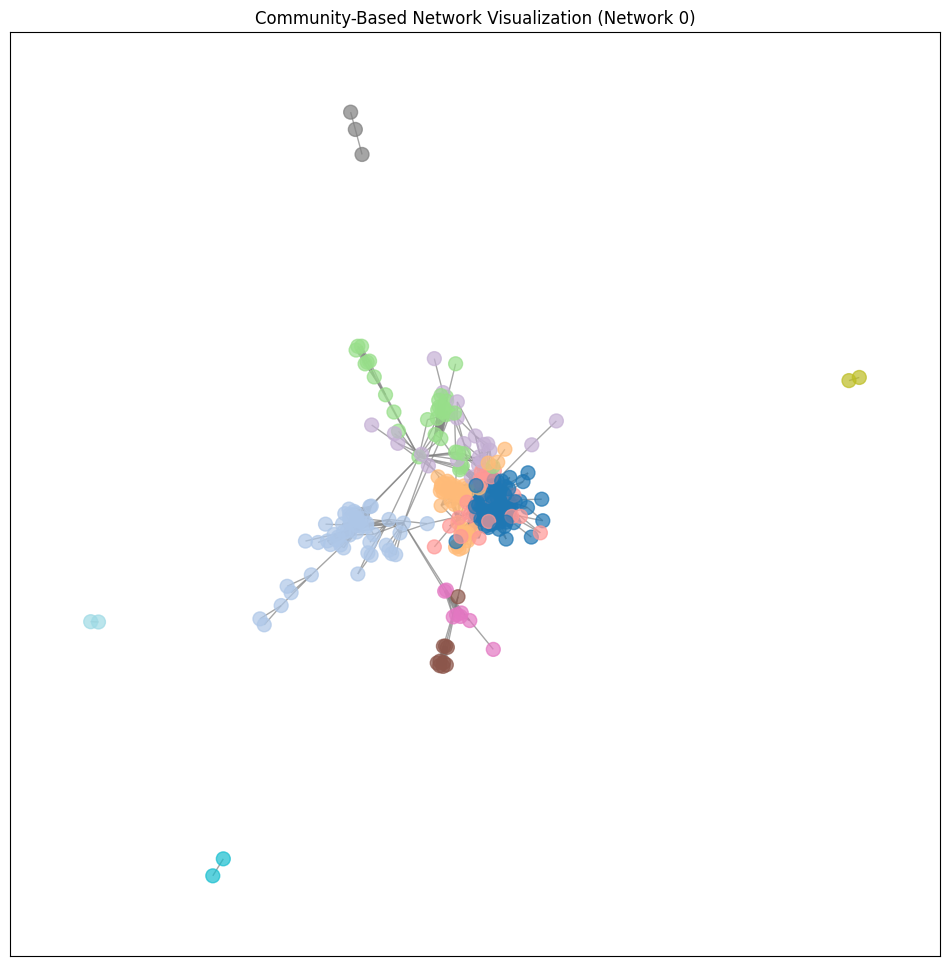

In [15]:
# Main loop
for network in prefix:
    # Loading the edges file and creating the graph
    edge_file = os.path.join(data_dir, f"{network}.edges")
    G = nx.read_edgelist(edge_file, delimiter=' ', nodetype=int)

    
    # Graph + Nodes + Edge Count
    print(f"Graph for network {network} loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    # Statistics on social network
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    clustering_coefficient = nx.clustering(G)
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    subgraph = G.subgraph(largest_component)
    diameter = nx.diameter(subgraph)
    triadic_closure = nx.transitivity(G)
    print(f"Average Degree Centrality:", sum(degree_centrality.values()) / len(degree_centrality))
    print(f"Average Betweenness Centrality:", sum(betweenness_centrality.values()) / len(betweenness_centrality))
    print(f"Average Clustering Coefficient:", sum(clustering_coefficient.values()) / len(clustering_coefficient))
    print("Network diameter of largest component:", diameter)
    print("Triadic closure:", triadic_closure)

    
    # Drawing the basic graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, node_size=10)
    plt.title(f"Network {network}")
    plt.savefig(f'basicNetwork{network}.png')
    plt.show()

    
    # Detecting communities
    communities = nx.algorithms.community.greedy_modularity_communities(G)
    community_map = {node: i for i, community in enumerate(communities) for node in community}
    # Setting node colors
    node_colors = [community_map[node] for node in G.nodes]
    # Finding the most connected nodes
    most_connected_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    most_connected_nodes = [node for node, _ in most_connected_nodes]
    # Printing the number of edges of the most connected nodes
    print(f"Most connected nodes in Network {network}:")
    for node in most_connected_nodes:
        print(f"Node {node} has {G.degree(node)} edges (degree)")
    # Setting node sizes and highlighting the most connected nodes
    node_sizes = [degree_centrality[node] * 1000 if node in most_connected_nodes else 100 for node in G.nodes]

    
    # Drawing the community networks
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        cmap=plt.cm.tab20,
        with_labels=False,
        edge_color="gray",
        alpha=0.7
    )
    plt.title(f"Community-Based Network Visualization (Network {network})")
    plt.savefig(f'coloredNetwork{network}.png')
    plt.show()

    print("\n")